# Tensor shape

Here are constraints I introduced to the NSF project:

1. **Tensor shape**: assume all tensors are in shape **(batchsize, length, dim-1, dim-2, ...)**, where 
    * batchsize: batch size of a data batch;
    * length: maximum length of data sequences in the batch;
    * dim-1: dimension of feature vector in one frame;
    * dim-2: when a feature vector per frame has more than 1 dimensions;
   
   Length is equivalent to the number of frames, or number of waveform sampling points.
   
2. **Behavior**: hidden layers should not change **batchsize** and **length** of input tensors unless specified (e.g., down-sampling, up-sampling)
    


### Examples on tensor shape

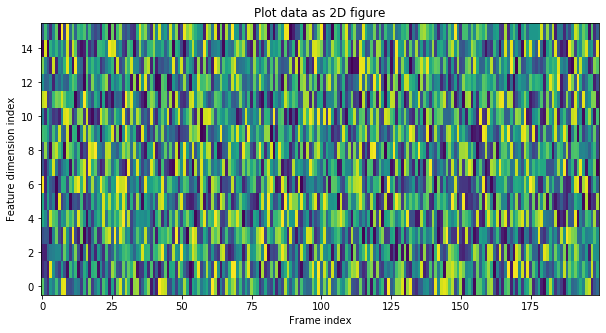

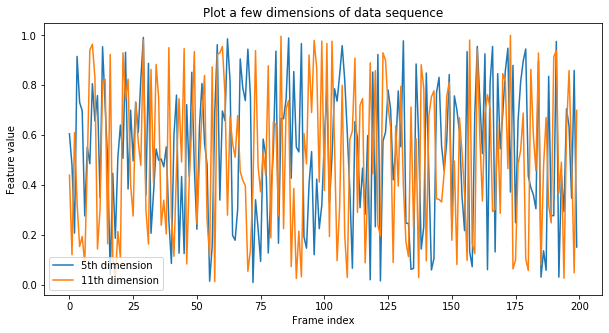

In [17]:
import matplotlib
import matplotlib.pyplot as plt
import torch

# some macro definition
# figure size for plotting
matplotlib.rcParams['figure.figsize'] = (10, 5)

# create a data
batch_size = 3
frame_length = 200
feature_dim = 16
data = torch.rand(batch_size, frame_length, feature_dim)


# plot the first data sequence as 2D figure
fig = plt.figure()
axis = fig.add_subplot(111)
axis.imshow(data[0, :, :].T, origin='lower', aspect='auto')
axis.set_xlabel('Frame index')
axis.set_ylabel('Feature dimension index')
axis.set_title("Plot data as 2D figure")

# plot a few dimensions of the data sequence
dims = [4, 10]
fig = plt.figure()
axis = fig.add_subplot(111)
axis.plot(data[0, :, dims])
axis.set_xlabel('Frame index')
axis.set_ylabel('Feature value')
axis.set_title("Plot a few dimensions of data sequence")
axis.legend([str(x+1) + 'th dimension' for x in dims])


The end